This notebook shows an implementation of the epsilon "soft" support vector regression on a dataset of point that follows non linear function.

**Model:**

SVR with kernel and model with slack variables.

**Remarks:**
- We use the already existing implementation from `scikit-learn`.

In [6]:
%load_ext autoreload
%autoreload 2

# Third party libraries imports
import numpy as np

# Local imports
from sv_machines.datasets.function_a import get_function_a_dataset, get_function_a_plot
from sklearn.svm import SVR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load a line dataset

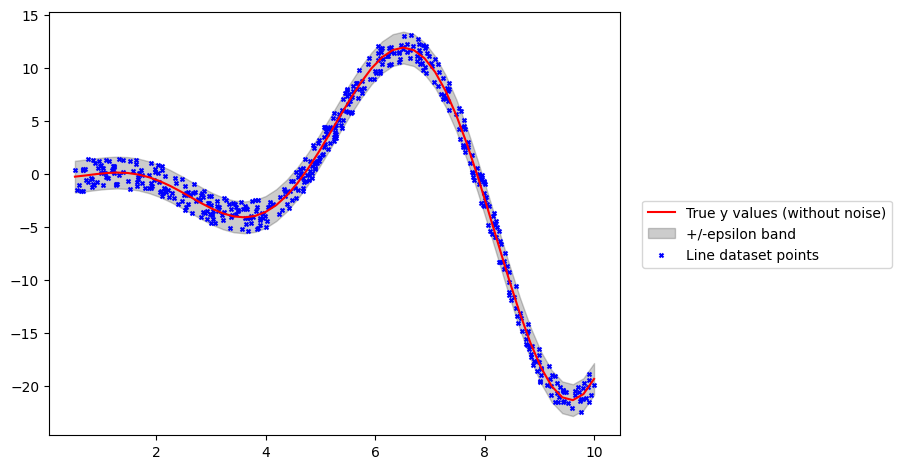

In [7]:
radius, epsilon = 5, 1.5

x_data, y_data = get_function_a_dataset(epsilon=epsilon, num_points=500, epsilon_strict=True)
fig, ax = get_function_a_plot(x_data, y_data, epsilon, with_true_function=True)
fig.tight_layout() 
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Perfom $\varepsilon$ "soft" support vector regression on the dataset


-----------------------------
C=1, epsilon=1.6, kernel=poly
-----------------------------

SVR(epsilon=1.6, kernel='poly', max_iter=10000)
-----------------------------
C=1, epsilon=2, kernel=poly
-----------------------------

SVR(epsilon=2, kernel='poly', max_iter=10000)


c:\Users\Famille\Documents\Annabelle\SV-Machines\.venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Famille\Documents\Annabelle\SV-Machines\.venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-----------------------------
C=0.1, epsilon=2, kernel=poly
-----------------------------

SVR(epsilon=2, kernel='poly', max_iter=10000)
-----------------------------
C=0.001, epsilon=2, kernel=poly
-----------------------------

SVR(epsilon=2, kernel='poly', max_iter=10000)


c:\Users\Famille\Documents\Annabelle\SV-Machines\.venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Famille\Documents\Annabelle\SV-Machines\.venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-----------------------------
C=0.0001, epsilon=2, kernel=poly
-----------------------------

SVR(epsilon=2, kernel='poly', max_iter=10000)
-----------------------------
C=1e-05, epsilon=2, kernel=poly
-----------------------------

SVR(epsilon=2, kernel='poly', max_iter=10000)


c:\Users\Famille\Documents\Annabelle\SV-Machines\.venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Famille\Documents\Annabelle\SV-Machines\.venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-----------------------------
C=1, epsilon=1.6, kernel=rbf
-----------------------------

SVR(epsilon=1.6, max_iter=10000)
-----------------------------
C=1, epsilon=2, kernel=rbf
-----------------------------

SVR(epsilon=2, max_iter=10000)
-----------------------------
C=0.1, epsilon=2, kernel=rbf
-----------------------------

SVR(epsilon=2, max_iter=10000)
-----------------------------
C=0.001, epsilon=2, kernel=rbf
-----------------------------

SVR(epsilon=2, max_iter=10000)
-----------------------------
C=0.0001, epsilon=2, kernel=rbf
-----------------------------

SVR(epsilon=2, max_iter=10000)
-----------------------------
C=1e-05, epsilon=2, kernel=rbf
-----------------------------

SVR(epsilon=2, max_iter=10000)
-----------------------------
C=1, epsilon=1.6, kernel=sigmoid
-----------------------------

SVR(epsilon=1.6, kernel='sigmoid', max_iter=10000)
-----------------------------
C=1, epsilon=2, kernel=sigmoid
-----------------------------

SVR(epsilon=2, kernel='sigmoid

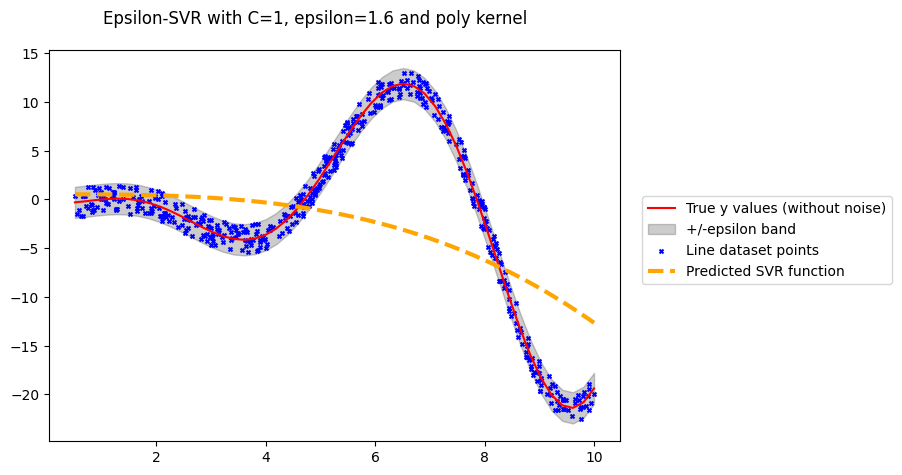

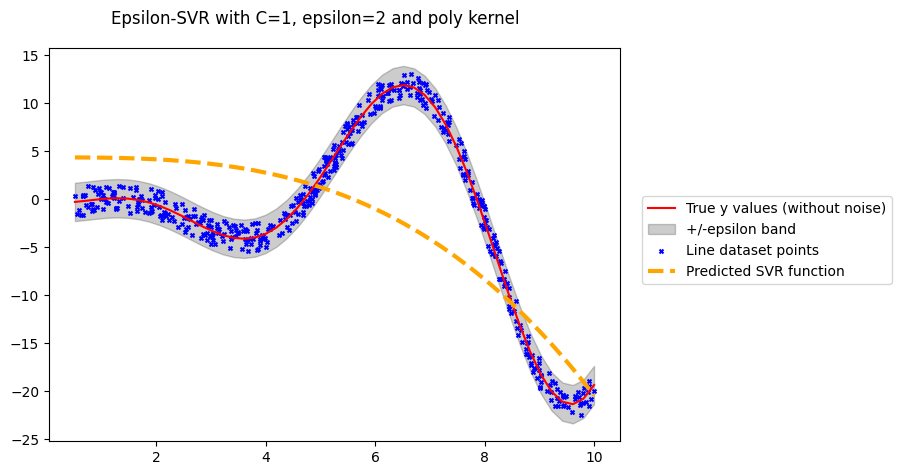

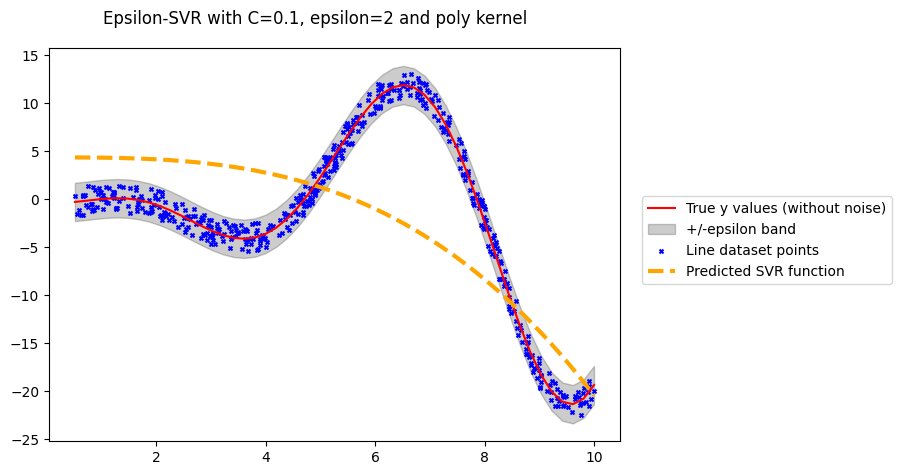

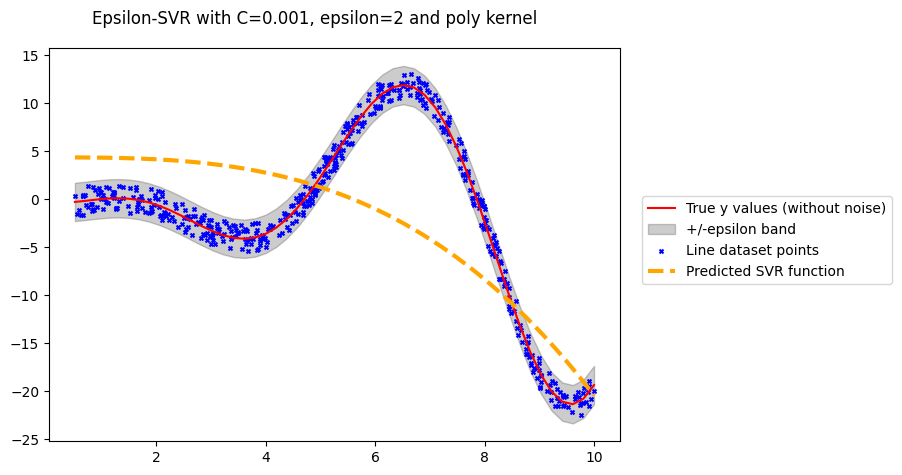

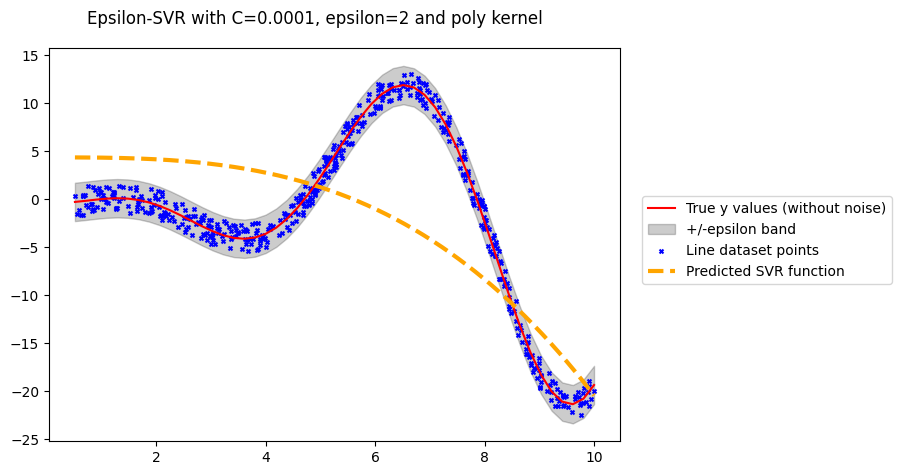

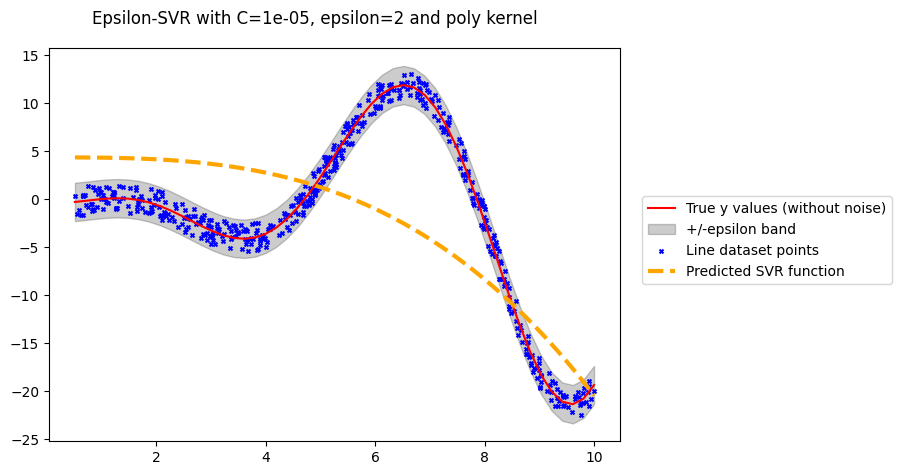

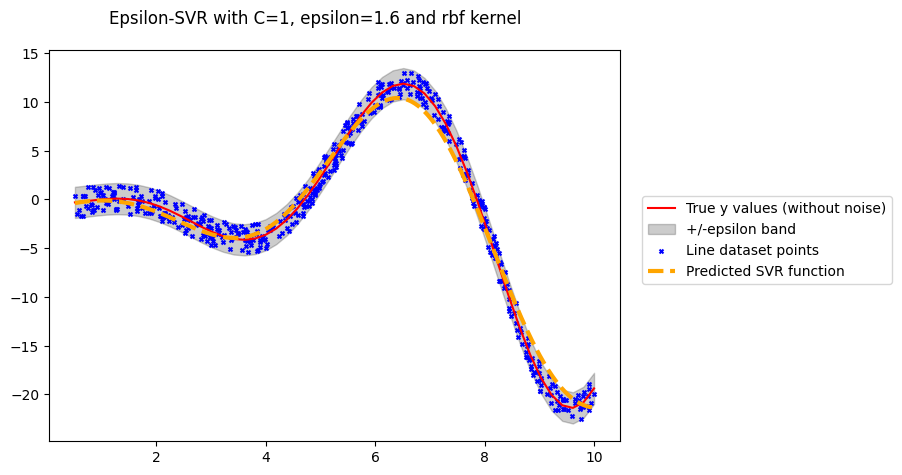

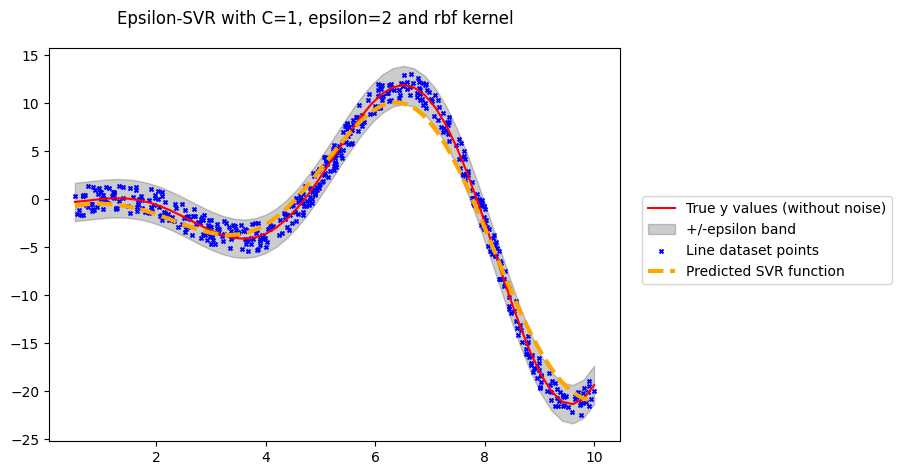

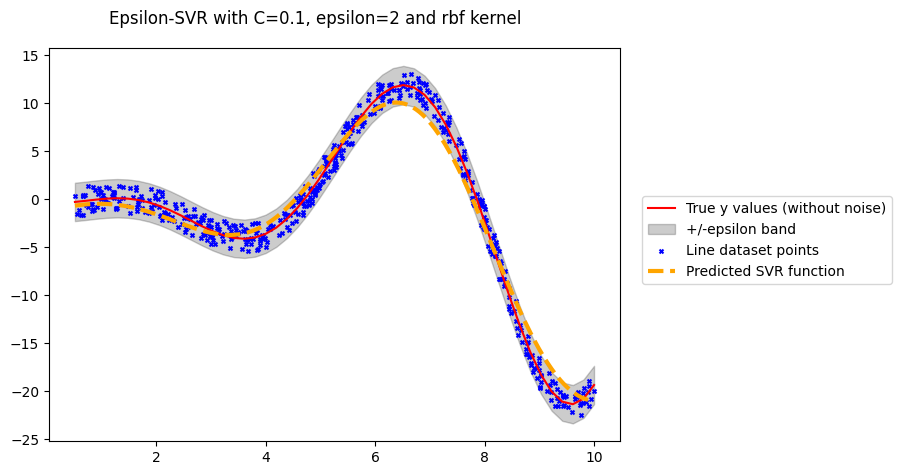

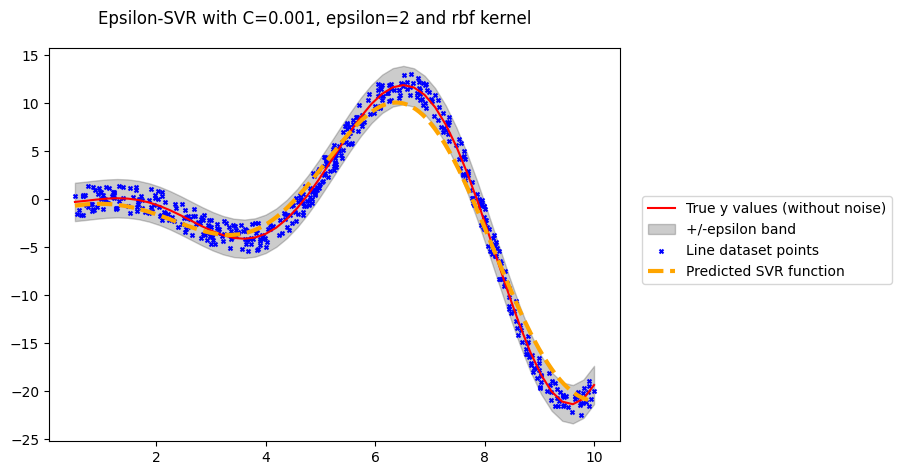

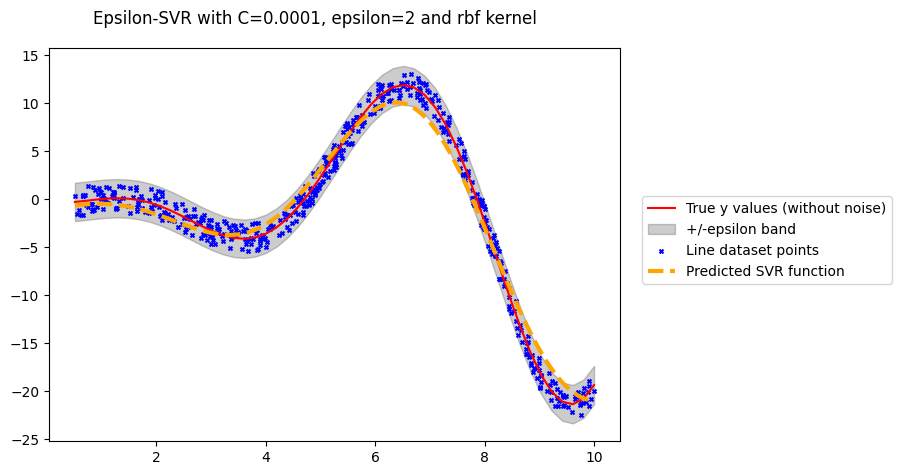

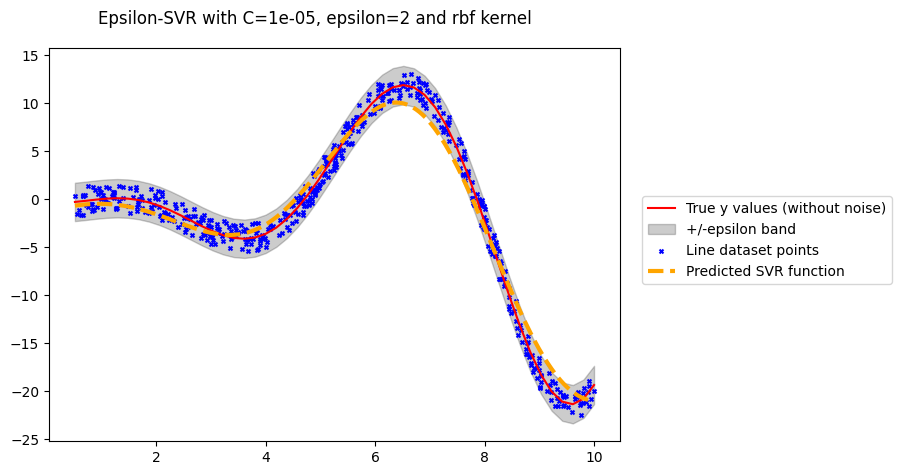

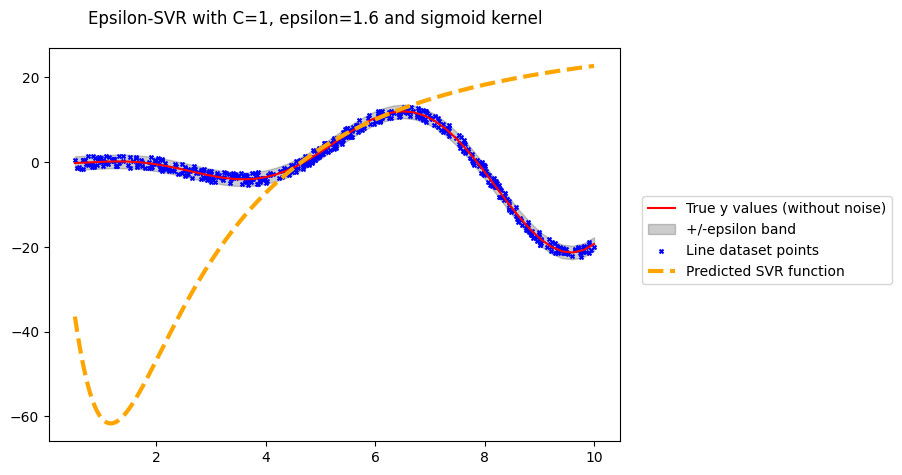

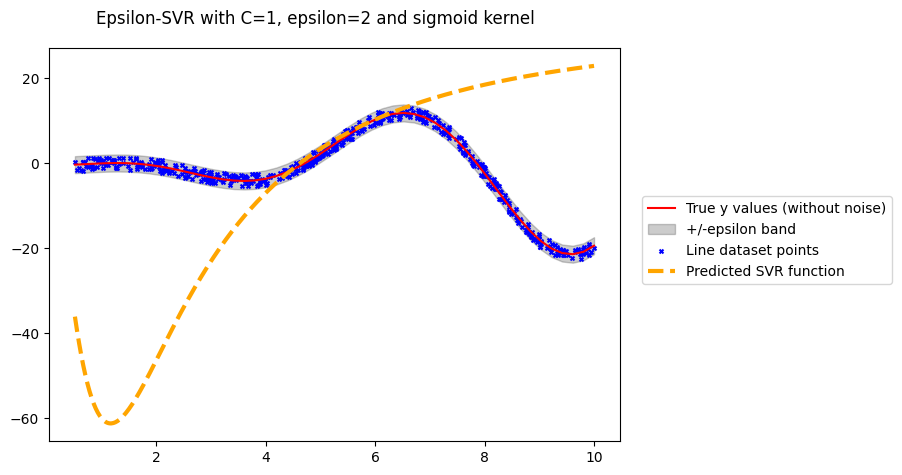

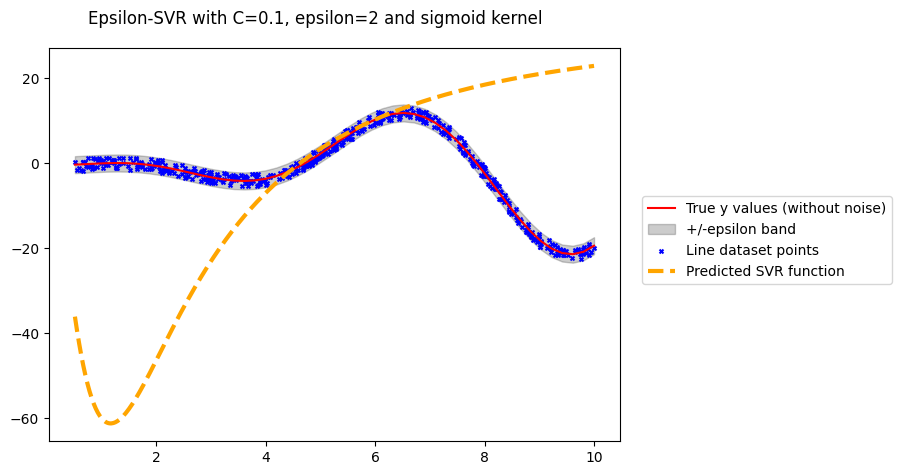

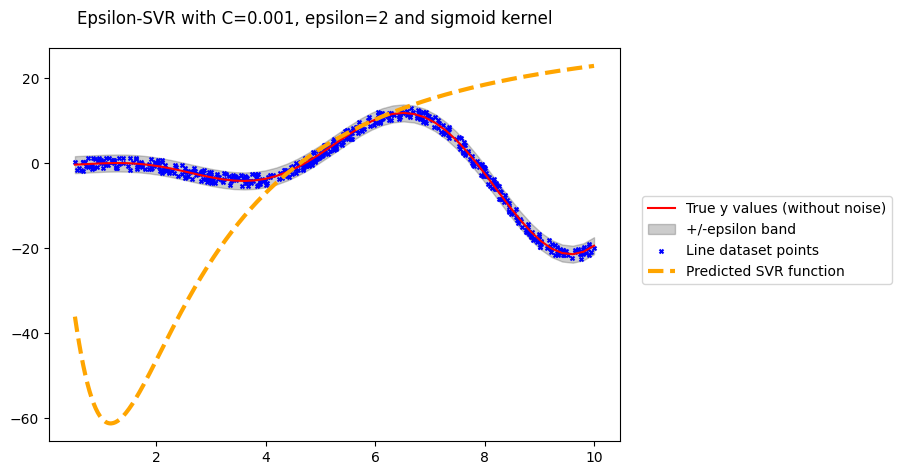

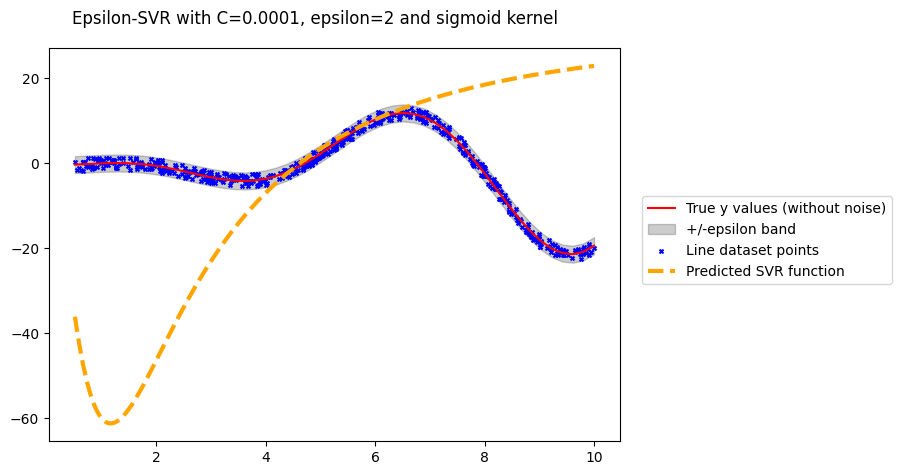

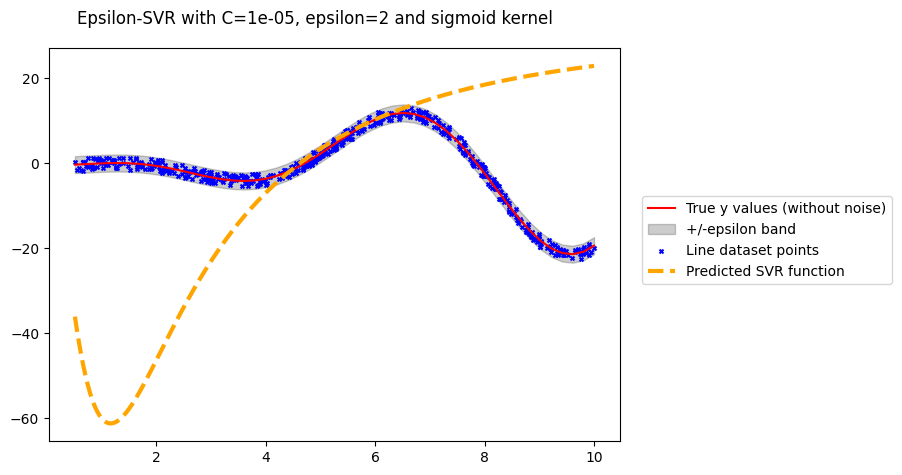

In [8]:
for kernel in ['poly', 'rbf', 'sigmoid']:
    for C, epsilon in [(1, 1.6), (1, 2), (10**-1,2), (10**-3,2), (10**-4,2), (10**-5,2)]:
        print(f"-----------------------------\nC={C}, epsilon={epsilon}, kernel={kernel}\n-----------------------------\n")
        model = SVR(epsilon=epsilon, kernel=kernel, max_iter=10000)
        model.fit(x_data.reshape(-1,1), y_data)
        print(model)
        # print(f"Regression function : y={model.coef_}*x+{model.intercept_} \n")
        fig, ax = get_function_a_plot(x_data, y_data, epsilon, with_true_function=True)
        x_ordered = np.linspace(min(x_data), max(x_data), 500)
        ax.plot(x_ordered, model.predict(x_ordered.reshape(-1,1)), color='orange', linestyle='--', linewidth=3, label=f'Predicted SVR function')
        fig.suptitle(f'Epsilon-SVR with C={C}, epsilon={epsilon} and {kernel} kernel')
        fig.tight_layout()
        fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))


